In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Iris dataset from UCI machine learning repository using pandas

In [2]:
dataset = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)

In [3]:
dataset.columns = ['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm', 'class']

#### Now it's time to look at the data

In [4]:
dataset.shape

(150, 5)

By seeing the shape of dataset, we got an idea of size and features of data. Lets have a look on first few rows of data.

In [5]:
dataset.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Now we can have a look at the summary of each attribute which includes the count, mean, standard deviation, min and max values as well as some percentiles.

In [6]:
dataset.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Here we can see that all the fatures have numeric values and same scales in 'cms'. And also all the columns have count as 150, so there is no missing data.

Now we should check the no. of instances that belong to each class and know whether dataset has balanced or unbalanced classes.

In [7]:
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

Here we see that all three classes have equal instances.

As we can see the count of statistical summary of dataset that we don't have any missing values. Else we could check if there is any missing data by following line of code. If we had found any missing data, we had to impute it.

In [8]:
dataset.isnull().sum()

sepal length in cm    0
sepal width in cm     0
petal length in cm    0
petal width in cm     0
class                 0
dtype: int64

Now we should viasualize the dataset.

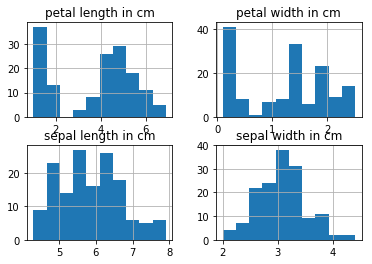

In [9]:
dataset.hist()
plt.show()

it looks like two of the features follow the Gaussian distribution. 

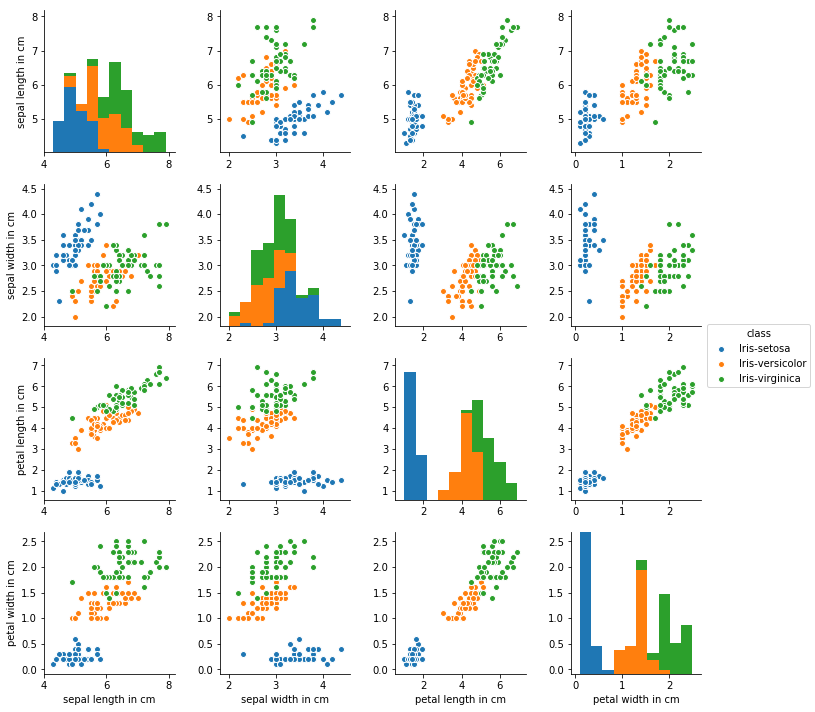

In [10]:
sns.pairplot(dataset, hue = 'class')
plt.show()

After graphing the features in a pair plot, it is clear that the relationship between pairs of features of a iris-setosa (in blue) is distinctly different from those of the other two species.
There is some overlap in the pairwise relationships of the other two species, iris-versicolor (orange) and iris-virginica (green).
On the diagonal of this paiplot, the histograms of features are plotted which we did in previous cell.

# Modeling with sklearn

Now lets put this data into sample features and class

Also we need to convert our class labels into numerical froms (0,1,2) before applying any machine learning model.

In [11]:
class_mapping = {'Iris-setosa' : 0, 'Iris-versicolor' : 1, 'Iris-virginica' : 2 }
dataset['class'] = dataset['class'].map(class_mapping)

In [12]:
X = dataset.iloc[: , : -1 ].values
y = dataset.iloc[ : , -1].values

In [13]:
X.shape, y.shape

((150, 4), (150,))

Now lets split the data into two sets - training and test data

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

random_state parameter is splitting the dataset into train and test data such that these sets have all the classes. or we have to randomly shuffle the data.
we can confirm this by following code.

In [16]:
(y_train == 0 ).sum(), (y_train == 1 ).sum(), (y_train == 2 ).sum()

(39, 37, 44)

There are some classification models (like LR,KNN,SVC,NN) which are sensitive towards the scale of attributes. Though we have almost same scale of all the attributes, still we can normalize our dataset so that it can learn faster.

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

We could scale the entire dataset before splitting into training and test set. But that is a bad practice and can cause data leakage.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [19]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('GNB', GaussianNB()))
models.append(('Forest', RandomForestClassifier()))

In [20]:
names = []
scores = []
for name, model in models:
    kfold = StratifiedKFold(n_splits = 10,random_state = 0)
    val_score = cross_val_score(model, X_train_std, y_train, cv = kfold, scoring='accuracy')
    scores.append(val_score)
    names.append(name)
    print('%s : %f (%f)' %(name, val_score.mean(), val_score.std()))

LR : 0.878986 (0.083767)
Tree : 0.924382 (0.070113)
KNN : 0.931958 (0.085782)
SVC : 0.943357 (0.065110)
GNB : 0.949499 (0.054121)
Forest : 0.932716 (0.063430)


We can see here that, KNN has the largest estimated accuracy score.
Now we want to get an idea of the accuracy of the model on our validation set.

In [21]:
knn = KNeighborsClassifier()
knn.fit(X_train_std, y_train)
predictions = knn.predict(X_test_std) 
print('Accuracy : ', accuracy_score(predictions, y_test) )
print('\nConfusion Matrix :\n')
print(confusion_matrix(predictions, y_test))
print('\nClassification Report : \n')
print(classification_report(predictions, y_test))

Accuracy :  1.0

Confusion Matrix :

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

Classification Report : 

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      1.00      1.00        13
          2       1.00      1.00      1.00         6

avg / total       1.00      1.00      1.00        30



We can see that the accuracy is 0.9 or 90%. The confusion matrix provides an indication of the three errors made. Finally, the classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results 